In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

### 1. Load NumPy Arrays

In [3]:
# Load numpy arrays
denoise_output = np.load('/workspaces/EEGdenoiseNet/results/SimpleCNN_EOG_Trial1/1/nn_output/Denoiseoutput_test.npy', allow_pickle=True)
eeg_test = np.load('/workspaces/EEGdenoiseNet/results/SimpleCNN_EOG_Trial1/1/nn_output/EEG_test.npy', allow_pickle=True)
noise_input = np.load('/workspaces/EEGdenoiseNet/results/SimpleCNN_EOG_Trial1/1/nn_output/noiseinput_test.npy', allow_pickle=True)

# shape = (3400, 512)

In [21]:
loss_history = np.load('/workspaces/EEGdenoiseNet/results/SimpleCNN_EOG_Trial1/1/nn_output/loss_history.npy', allow_pickle=True)

### 2. Loss History

In [23]:
loss_history

array({'grads': {'mse': [0.024237842962611455, 0.028354638143826043, 0.03058506126570351, 0.02936174697790514, 0.027735021142015114, 0.026172421224798792, 0.024646113791009942, 0.023392081998891236, 0.02242133050800905, 0.0215973373105311, 0.020789711874471442, 0.020077980091959678, 0.019390544570598967, 0.01880162317607115, 0.018265594485873254, 0.01779060941394965, 0.017336223651791965, 0.016944650752360325, 0.016552396653466573, 0.01633768183494207]}, 'loss': {'train_mse': [0.1263318623193677, 0.052526552222305636, 0.03961909539525848, 0.03364050413934064, 0.029596177191850162, 0.02645988779566533, 0.02386992960738599, 0.021656511236548343, 0.019733717667329283, 0.018053056530358845, 0.016585029888474764, 0.015305440902114517, 0.014189984434165682, 0.013216372531956212, 0.012363301003360895, 0.011613989355667946, 0.0109527532403455, 0.010366258898458871, 0.009843545166681456, 0.009374768801898843], 'val_mse': [<tf.Tensor: shape=(), dtype=float32, numpy=0.07585174>, <tf.Tensor: shape

In [24]:
loss_history = dict(enumerate(loss_history.flatten()))

In [25]:
loss_history

{0: {'grads': {'mse': [0.024237842962611455,
    0.028354638143826043,
    0.03058506126570351,
    0.02936174697790514,
    0.027735021142015114,
    0.026172421224798792,
    0.024646113791009942,
    0.023392081998891236,
    0.02242133050800905,
    0.0215973373105311,
    0.020789711874471442,
    0.020077980091959678,
    0.019390544570598967,
    0.01880162317607115,
    0.018265594485873254,
    0.01779060941394965,
    0.017336223651791965,
    0.016944650752360325,
    0.016552396653466573,
    0.01633768183494207]},
  'loss': {'train_mse': [0.1263318623193677,
    0.052526552222305636,
    0.03961909539525848,
    0.03364050413934064,
    0.029596177191850162,
    0.02645988779566533,
    0.02386992960738599,
    0.021656511236548343,
    0.019733717667329283,
    0.018053056530358845,
    0.016585029888474764,
    0.015305440902114517,
    0.014189984434165682,
    0.013216372531956212,
    0.012363301003360895,
    0.011613989355667946,
    0.0109527532403455,
    0.010366

In [29]:
loss_history = loss_history[0]
loss_history.keys()

dict_keys(['grads', 'loss'])

In [34]:
grads = loss_history['grads']
mse = grads['mse']

In [37]:
mse

[0.024237842962611455,
 0.028354638143826043,
 0.03058506126570351,
 0.02936174697790514,
 0.027735021142015114,
 0.026172421224798792,
 0.024646113791009942,
 0.023392081998891236,
 0.02242133050800905,
 0.0215973373105311,
 0.020789711874471442,
 0.020077980091959678,
 0.019390544570598967,
 0.01880162317607115,
 0.018265594485873254,
 0.01779060941394965,
 0.017336223651791965,
 0.016944650752360325,
 0.016552396653466573,
 0.01633768183494207]

In [42]:
loss = loss_history['loss']
train_mse = loss['train_mse']
val_mse = loss['val_mse']

In [39]:
train_mse

[0.1263318623193677,
 0.052526552222305636,
 0.03961909539525848,
 0.03364050413934064,
 0.029596177191850162,
 0.02645988779566533,
 0.02386992960738599,
 0.021656511236548343,
 0.019733717667329283,
 0.018053056530358845,
 0.016585029888474764,
 0.015305440902114517,
 0.014189984434165682,
 0.013216372531956212,
 0.012363301003360895,
 0.011613989355667946,
 0.0109527532403455,
 0.010366258898458871,
 0.009843545166681456,
 0.009374768801898843]

In [49]:
val_mse = [elem.numpy() for elem in val_mse]

In [50]:
val_mse

[0.07585174,
 0.057042558,
 0.052179735,
 0.050146338,
 0.04910517,
 0.048567127,
 0.048285756,
 0.048165526,
 0.048118442,
 0.048174053,
 0.048264697,
 0.048413433,
 0.048593096,
 0.048779324,
 0.04896833,
 0.049146254,
 0.049332067,
 0.049487725,
 0.049630333,
 0.049771763]

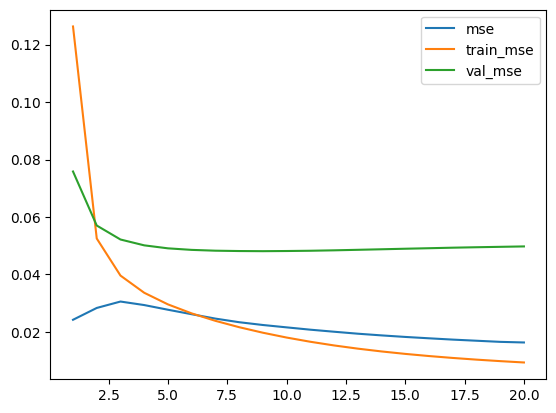

In [57]:
epoch = np.linspace(1, 20, 20)
plt.plot(epoch, mse)
plt.plot(epoch, train_mse)
plt.plot(epoch, val_mse)
plt.legend(['mse', 'train_mse', 'val_mse'])
plt.show()

### 3. Plot EEG

In [7]:
def plot_eeg(i, input, output, noise):
    fig, axs = plt.subplots(3)
    fig.suptitle('EEG input, output, and noise')
    axs[0].plot(input[i])
    axs[1].plot(output[i])
    axs[2].plot(noise[i])
    plt.show()

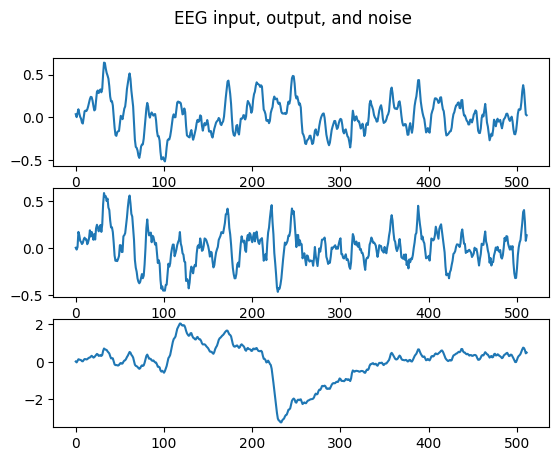

In [12]:
i = 58
plot_eeg(i, eeg_test, denoise_output, noise_input)